In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error as mse
import sklearn.gaussian_process as gp

In [47]:
j = pd.read_csv('JULY_B_2018.csv')
a = pd.read_csv('AUG_B_2018.csv')
s = pd.read_csv('SEP_B_2018.csv')
o = pd.read_csv('OCT_B_2018.csv')
n = pd.read_csv('NOV_B_2018.csv')
d = pd.read_csv('DEC_B_2018.csv')
jan = pd.read_csv('JAN_B_2019.csv')
fab = pd.read_csv('FAB_B_2019.csv')
m = pd.read_csv('MAR_B_2018.csv')
ma = pd.read_csv('APR_B_2018.csv')
my = pd.read_csv('MAY_B_2018.csv')
ju = pd.read_csv('JUNE_B_2018.csv')
mar2019 = pd.read_csv('MAR_B_2019.csv')

In [48]:
ff3 = m.T.iloc[21:55]
ff4 = ma.T.iloc[21:55] # july data
ff5 = my.T.iloc[21:55] # august data
ff6 = ju.T.iloc[21:55] # september data
ff7 = j.T.iloc[21:55] # October data
ff8 = a.T.iloc[21:55] # november data
ff9 = s.T.iloc[21:55] # december data
ff10 = o.T.iloc[21:55] # january data
ff11 = n.T.iloc[21:55] # february data
ff12 = d.T.iloc[21:55]    # march data
ff1 = jan.T.iloc[21:55] # january data
ff2 = fab.T.iloc[21:55] #february
ffx = mar2019

In [49]:
ff3 = ff3.T

In [50]:
data = []
for d in ff3.values:
    for dx in d:
        data.append(dx)

In [52]:
d1 = data[1:]
d2 = data[0:len(data)-1]

In [150]:
# breaking the data into train and test
X_train = data[:600]
X_test = data[600:]

In [152]:
# Support for maths
!pip install GPy
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

You should consider upgrading via the 'c:\users\karan\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [153]:
X = X_train[:len(X_train)-3]
y = X_train[3:]

In [154]:
y_test = X_test[3:]
X_test = np.array(X_test[:len(X_test)-3]).reshape(-1,1)

In [155]:
len(X),len(y)

(597, 597)

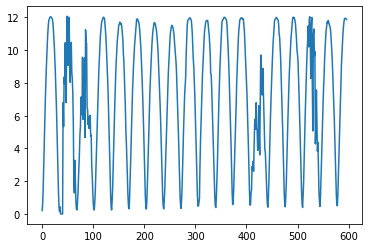

In [156]:
plt.plot(X)

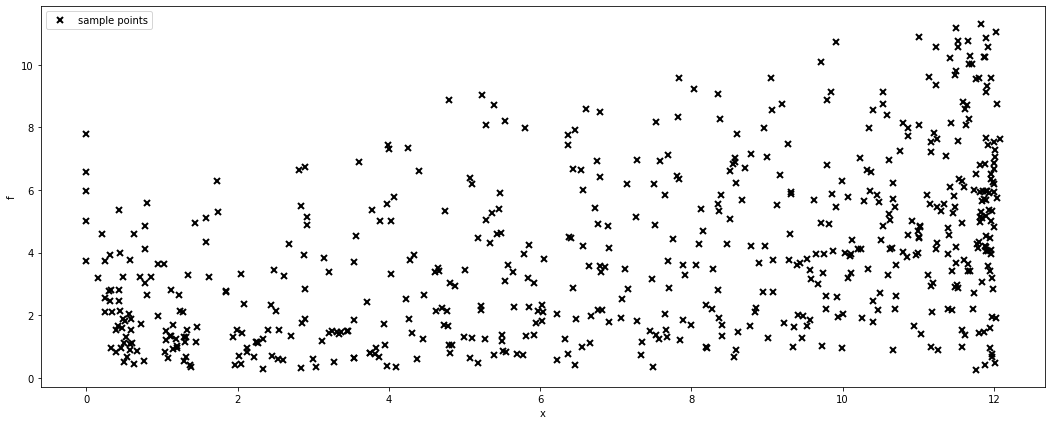

In [157]:
plt.figure(figsize=(18, 7))
# Plot observations
plt.plot(X, Y, "kx", mew=2)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

In [158]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
kernel = gp.kernels.RBF(10.0, (1e-3, 1e3))

In [189]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) #* 
kernel = RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
#>>> for hyperparameter in kernel.hyperparameters: print(hyperparameter)

In [190]:
X = np.array(X).reshape(-1,1)
Y = Y

In [191]:
X = np.array(X)
Y = np.array(Y)

In [192]:
model = gp.GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

In [193]:
model.fit(X, y)
params = model.kernel_.get_params()

In [194]:
y_pred, std = model.predict(X_test, return_std=True)

In [249]:
y_pred1 = 1.96*std+y_pred
y_pred2 = y_pred - 1.96*std

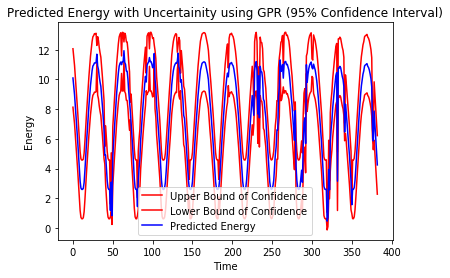

In [252]:
plt.plot(y_pred1,'-r')
plt.plot(y_pred2,'-r')
plt.plot(y_pred,'-b')
#plt.fill_between(y_pred1, y_pred2, color='#539ecd')
plt.legend(["Upper Bound of Confidence","Lower Bound of Confidence","Predicted Energy"])
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Predicted Energy with Uncertainity using GPR (95% Confidence Interval)")
plt.show()

In [258]:
v = [i for i in range (0,383) ]

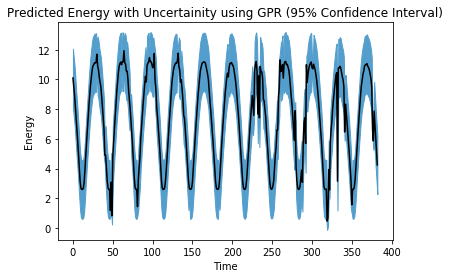

In [265]:
plt.plot(y_pred,'-k')
plt.fill_between(v, y_pred1, y_pred2, color='#539ecd')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Predicted Energy with Uncertainity using GPR (95% Confidence Interval)")
plt.show()

In [266]:
MSE = math.sqrt(((y_pred-y_test)**2).mean())

In [267]:
print("Mean Squared Error of the Model: ",math.sqrt(mse(y_test,y_pred)))

Mean Squared Error of the Model:  2.3036781913855657
